# Note: Here, we are running multiple models in this notebook file
# Always execute the model in sequential manner (or it may fail)
# Also Multiple training/test set is tabulated

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Working Directory

In [2]:
from os import chdir, getcwd
wd=getcwd()
# To Change the Working Directory
#chdir(r'C:/Users/shubham/Desktop')
#wd

# Reading Dataset with indexed Columns

In [3]:
# Load the dataset
ColNames = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

df = pd.read_csv('Diabetes.csv', header=None, names=ColNames)

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Inference

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Statistical inference before Normalization

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking Null & Duplicates

In [6]:
df.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
len(df[df.duplicated()])

0

# Histogram Plot on all columns

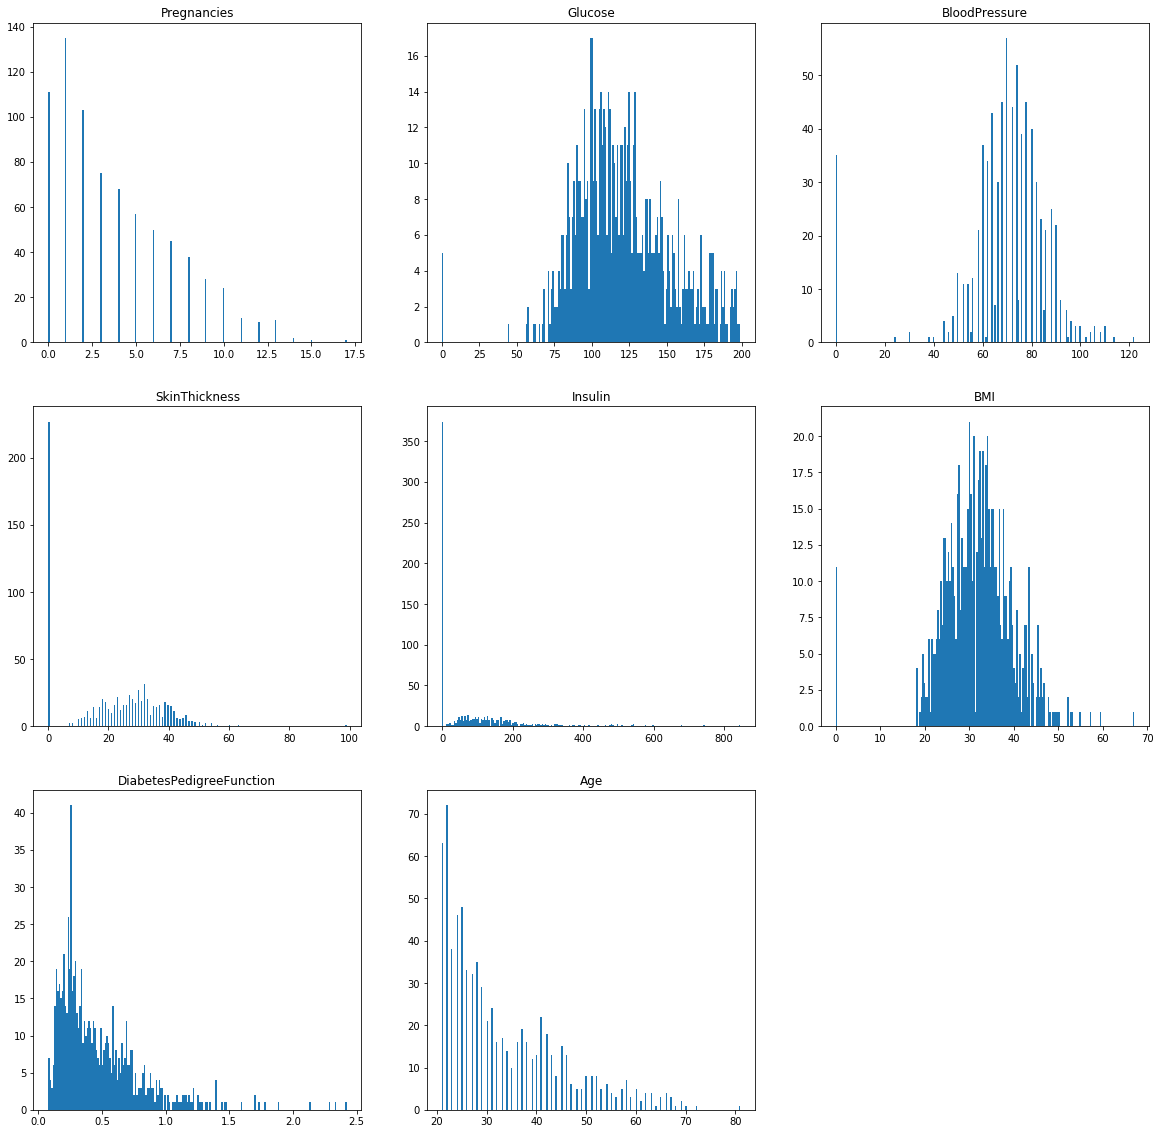

In [8]:
plt.figure(figsize=(20,20))
for i in range(0,8):
    plt.subplot(3,3,i+1)
    plt.hist(df[ColNames[i]],200)
    plt.title(ColNames[i])

# Box Plot for possible Outlier

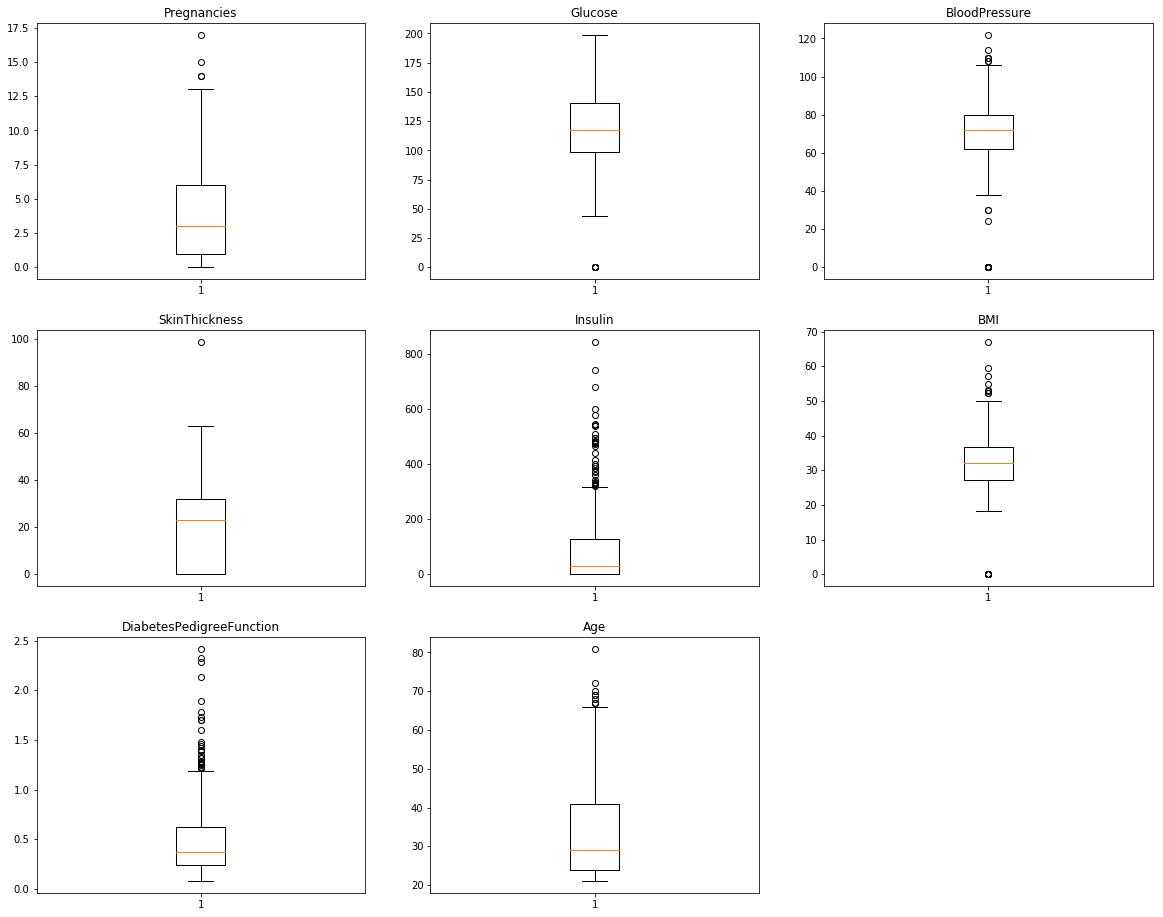

In [9]:
plt.figure(figsize=(20,16))
for i in range(0,8):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[ColNames[i]])
    plt.title(ColNames[i])

# Removing Skewness(LogTransform) on DiabetesPedigreeFunction, Insulin, Skinthickness Column

(array([ 14.,  49.,  89., 166., 126., 126., 115.,  55.,  21.,   7.]),
 array([-2.55104645, -2.20756505, -1.86408365, -1.52060225, -1.17712086,
        -0.83363946, -0.49015806, -0.14667666,  0.19680474,  0.54028614,
         0.88376754]),
 <a list of 10 Patch objects>)

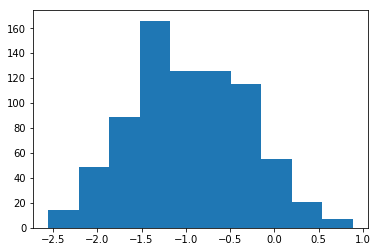

In [10]:
from numpy import exp
from scipy.stats import boxcox
#Log Transform to remove Skewness
df['DiabetesPedigreeFunction'] = boxcox(df['DiabetesPedigreeFunction'],0)
plt.hist(df['DiabetesPedigreeFunction'])


(array([  5.,   5.,  19.,  58., 453.,  91.,  79.,  35.,  18.,   5.]),
 array([2.63905733, 3.04920353, 3.45934974, 3.86949594, 4.27964214,
        4.68978834, 5.09993455, 5.51008075, 5.92022695, 6.33037316,
        6.74051936]),
 <a list of 10 Patch objects>)

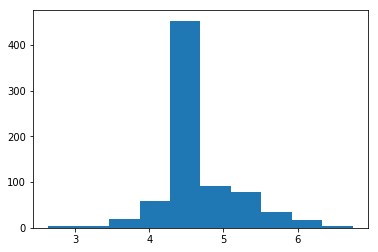

In [11]:
df['Insulin'] = np.where((df['Insulin'] <= 0), df['Insulin'].mean(), df['Insulin'])
df['Insulin'] = boxcox(df['Insulin'],0)
plt.hist(df['Insulin'])

(array([  4.,  11.,  38.,  71., 319., 165., 123.,  34.,   2.,   1.]),
 array([1.94591015, 2.21083112, 2.47575209, 2.74067306, 3.00559403,
        3.270515  , 3.53543597, 3.80035694, 4.06527791, 4.33019888,
        4.59511985]),
 <a list of 10 Patch objects>)

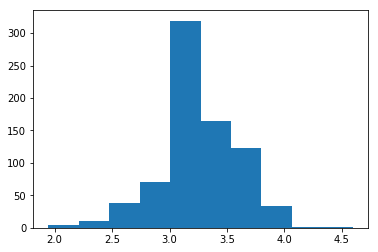

In [12]:
df['SkinThickness'] = np.where((df['SkinThickness'] <= 0), df['SkinThickness'].mean(), df['SkinThickness'])
df['SkinThickness'] = boxcox(df['SkinThickness'],0)
plt.hist(df['SkinThickness'])

In [13]:
# BOXCOX Arguments
# lambda = -1. is a reciprocal transform.
# lambda = -0.5 is a reciprocal square root transform.
# lambda = 0.0 is a log transform.
# lambda = 0.5 is a square root transform.
# lambda = 1.0 is no transform.

# Using Min-Max Normalization on all columns

In [14]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(x_scaled)
df.columns = ColNames

# Norm Scale in the range of [0,1]

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.480876,0.477952,0.476790,0.463229,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.132389,0.132698,0.117499,0.187586,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.406269,0.424351,0.406855,0.331731,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.449034,0.424351,0.476900,0.455198,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.573690,0.538123,0.545455,0.606449,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outlier Detection using Z-Score [-3,+3] - Allowed range

In [16]:
for index in range(df.shape[1]-1):
    col = ColNames[index]
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

# Print the Z-Score Column (x-u)/sigma

In [17]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_zscore,Glucose_zscore,BloodPressure_zscore,SkinThickness_zscore,Insulin_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore,Age_zscore
0,0.352941,0.743719,0.590164,0.607516,0.424351,0.500745,0.606798,0.483333,1.0,0.639947,0.848324,0.149641,0.957206,-0.404190,0.204013,0.765848,1.425995
1,0.058824,0.427136,0.540984,0.536532,0.424351,0.396423,0.437892,0.166667,0.0,-0.844885,-1.123396,-0.160546,0.420675,-0.404190,-0.684422,-0.135159,-0.190672
2,0.470588,0.919598,0.524590,0.406269,0.424351,0.347243,0.626977,0.183333,1.0,1.233880,1.943724,-0.263941,-0.563910,-0.404190,-1.103255,0.873492,-0.105584
3,0.058824,0.447236,0.540984,0.449034,0.464283,0.418778,0.221638,0.000000,0.0,-0.844885,-0.998208,-0.160546,-0.240676,-0.103074,-0.494043,-1.288739,-1.041549
4,0.000000,0.688442,0.327869,0.607516,0.605859,0.642325,0.983670,0.200000,1.0,-1.141852,0.504055,-1.504687,0.957206,0.964522,1.409746,2.776227,-0.020496


# BMI/Gulcose/BP/Insulin has Outliers, so Normalize with "mean" Values of each Column

In [18]:
#print(df[df.BloodPressure_zscore <= -3])

In [19]:
#print(df[df.Age_zscore >= 3])
for index in range(8):
    column = ColNames[index] 
    col_zscore = column + '_zscore'
    df[column] = np.where((df[col_zscore] < -3) | (df[col_zscore] > 3), df[column].mean(), df[column])
    

In [20]:
#print(df[df.BloodPressure_zscore <= -3])

In [21]:
#df.astype(bool).sum(axis=0)

# Column features after Outliers replaced with mean

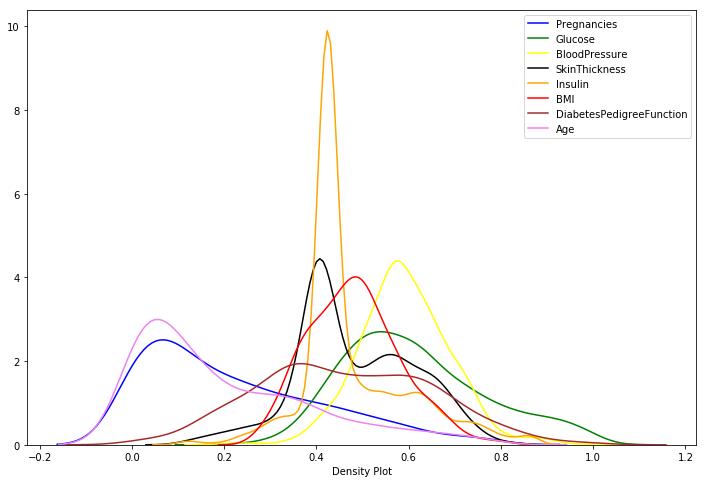

In [22]:
plt.figure(figsize=(12, 8))
sns.distplot(df['Pregnancies'],color='Blue',label='Pregnancies',hist=False)
sns.distplot(df['Glucose'],color='green',label='Glucose',hist=False)
sns.distplot(df['BloodPressure'],color='yellow',label='BloodPressure',hist=False)
sns.distplot(df['SkinThickness'],color='black',label='SkinThickness',hist=False)
sns.distplot(df['Insulin'],color='orange',label='Insulin',hist=False)
sns.distplot(df['BMI'],color='red',label='BMI',hist=False)
sns.distplot(df['DiabetesPedigreeFunction'],color='Brown',label='DiabetesPedigreeFunction',hist=False)
sns.distplot(df['Age'],color='violet',axlabel='Density Plot',label='Age',hist=False)

# Statistical Inference after Normalization

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_zscore,Glucose_zscore,BloodPressure_zscore,SkinThickness_zscore,Insulin_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore,Age_zscore
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,0.222762,0.611465,0.592253,0.482573,0.475645,0.481914,0.463229,0.199787,0.348958,-6.866614e-15,-2.503061e-15,2.561970e-15,-4.705582e-15,2.295892e-14,3.491456e-15,2.039095e-15,-6.641100e-16
std,0.192362,0.152945,0.099311,0.126832,0.118294,0.098790,0.187586,0.188717,0.476951,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,0.000000,0.221106,0.196721,0.134634,0.110201,0.271237,0.000000,0.000000,0.000000,-1.141852e+00,-3.783654e+00,-3.572597e+00,-3.634670e+00,-3.604133e+00,-4.060474e+00,-2.471038e+00,-1.041549e+00
25%,0.058824,0.501256,0.524590,0.406269,0.424351,0.409836,0.331731,0.050000,0.000000,-8.448851e-01,-6.852363e-01,-3.673367e-01,-5.639099e-01,-4.041901e-01,-5.955785e-01,-7.014634e-01,-7.862862e-01
50%,0.176471,0.587940,0.590164,0.449034,0.424351,0.476900,0.455198,0.133333,0.000000,-2.509521e-01,-1.218877e-01,1.496408e-01,-2.406760e-01,-4.041901e-01,9.419788e-04,-4.284235e-02,-3.608474e-01
75%,0.352941,0.704774,0.655738,0.573690,0.527852,0.543964,0.606449,0.316667,1.000000,6.399473e-01,6.057709e-01,5.632228e-01,7.015341e-01,4.537398e-01,5.847705e-01,7.639893e-01,6.602056e-01
max,0.764706,1.000000,1.000000,0.829389,0.869324,0.819672,1.000000,0.783333,1.000000,3.906578e+00,2.444478e+00,2.734528e+00,3.923771e+00,3.936659e+00,4.455807e+00,2.863336e+00,4.063716e+00


# Drop the Z-Score Columns

In [24]:
df = df.drop("Pregnancies_zscore",axis=1)
df = df.drop("Glucose_zscore",axis=1)
df = df.drop("BloodPressure_zscore",axis=1)
df = df.drop("SkinThickness_zscore",axis=1)
df = df.drop("Insulin_zscore",axis=1)
df = df.drop("BMI_zscore",axis=1)
df = df.drop("DiabetesPedigreeFunction_zscore",axis=1)
df = df.drop("Age_zscore",axis=1)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.607516,0.424351,0.500745,0.606798,0.483333,1.0
1,0.058824,0.427136,0.540984,0.536532,0.424351,0.396423,0.437892,0.166667,0.0
2,0.470588,0.919598,0.524590,0.406269,0.424351,0.347243,0.626977,0.183333,1.0
3,0.058824,0.447236,0.540984,0.449034,0.464283,0.418778,0.221638,0.000000,0.0
4,0.000000,0.688442,0.327869,0.607516,0.605859,0.642325,0.983670,0.200000,1.0


# Removing the Possible Outlier from BOX Plot Data range on each columns

In [25]:
df['BloodPressure'] = np.where((df['BloodPressure'] < 0.32) | (df['BloodPressure'] > 0.86), df['BloodPressure'].mean(), df['BloodPressure'])
#df['Insulin'] = np.where((df['Insulin'] > 0.29), df['Insulin'].mean(), df['Insulin'])
df['Insulin'] = np.where((df['Insulin'] < 0.37), df['Insulin'].mean(), df['Insulin'])
df['Insulin'] = np.where((df['Insulin'] > 0.53), df['Insulin'].mean(), df['Insulin'])
#df['DiabetesPedigreeFunction'] = np.where((df['DiabetesPedigreeFunction'] > 0.4), df['DiabetesPedigreeFunction'].mean(), df['DiabetesPedigreeFunction'])
df['BMI'] = np.where((df['BMI'] > 0.72), df['BMI'].mean(), df['BMI'])
df['SkinThickness'] = np.where((df['SkinThickness'] < 0.2) | (df['SkinThickness'] > 0.8), df['SkinThickness'].mean(), df['SkinThickness'])
df['Age'] = np.where((df['Age'] > 0.68), df['Age'].mean(), df['Age'])
#df.astype(bool).sum(axis=0)

# BoxPlot Shows - no Outlier's in dataset

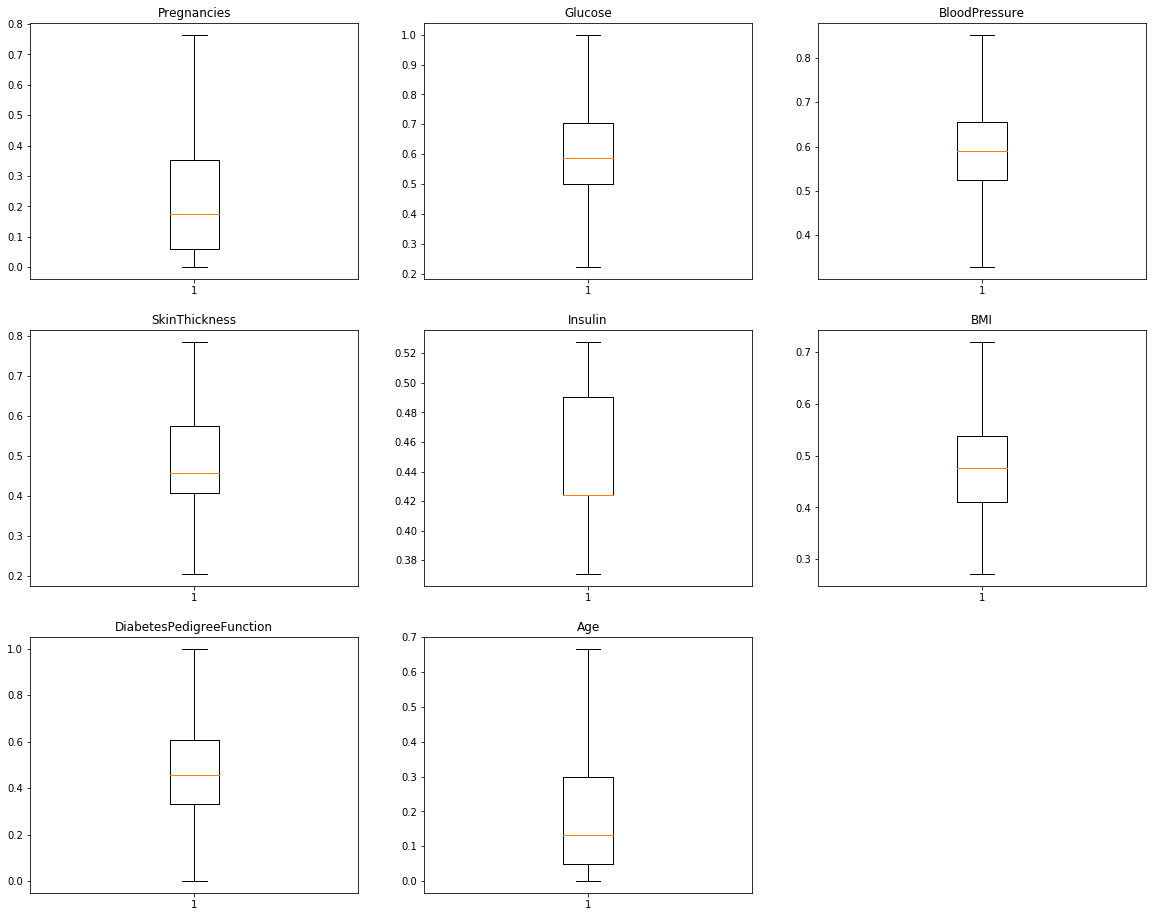

In [26]:
plt.figure(figsize=(20,16))
for i in range(0,8):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[ColNames[i]])
    plt.title(ColNames[i])

# Correlation b/w Variables

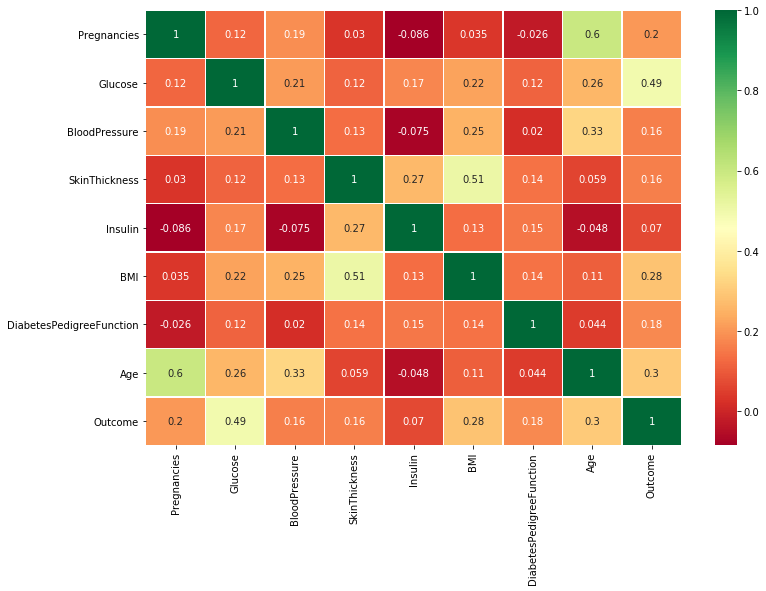

In [27]:
#Pearson correlation
plt.figure(figsize=(12, 8))
Pcorr = df.corr()
sns.heatmap(Pcorr,cmap ='RdYlGn', linewidths = 0.30,annot=True)
plt.show()

# All the features are Important in the dataset (less likely PedigreeFunction) 

# Scenario1: Without Removing any feature

# Importing SKLEARN Libraries

In [28]:
#importing train_test_split
from sklearn.model_selection import train_test_split
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#import confusion_matrix # ML Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Spliting Training & Test Dataset

In [29]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

#the proportion of labels should remain same in the splits, so we use "stratify"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [30]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

GaussianNB(priors=None)

# Predicting the Test Dataset

In [31]:
#Predict on test data
y_pred= model.predict(X_test)

# Evaluating the Prediction
# 0 - Not Diabetes
# 1 - Diabetes

# Confusion Matrix

In [32]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred)
cm


array([[125,  25],
       [ 30,  51]], dtype=int64)

In [33]:
pd.crosstab(y_test, y_pred, colnames = ['Predicted'], margins = True)

Predicted,0.0,1.0,All
Outcome,,,
0.0,125,25,150
1.0,30,51,81
All,155,76,231


# Accuracy, F1-Score, & MisClassification

In [34]:
accuracy_score(y_test, y_pred)

0.7619047619047619

In [35]:
f1_score(y_test, y_pred)

0.6496815286624203

# Misclassification FN+FP/(TP+FP+FN+TN)

In [36]:
#Misclassification 
(cm[1][0]+cm[0][1])/(cm[1][0]+cm[0][1]+cm[0][0]+cm[1][1])

0.23809523809523808

# Sensitivity TP/(TP+FN)

In [37]:
#Sensitivity
(cm[0][0])/(cm[0][1]+cm[0][0])

0.8333333333333334

# Specificity FP/(FP+TN)

In [38]:
#Specificity
(cm[1][1])/(cm[1][0]+cm[1][1])

0.6296296296296297

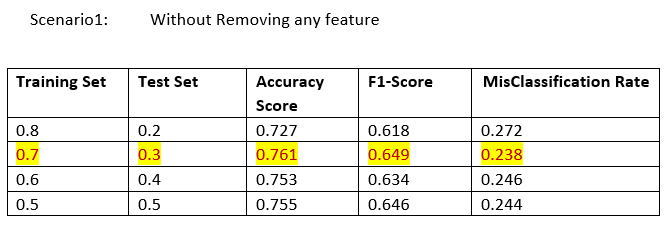

# Scenario2: Removing PedigreeFunction

# Drop the PedigreeFunction Column

In [39]:
df = df.drop("DiabetesPedigreeFunction",axis=1)

# Spliting Training & Test Dataset

In [40]:
X1 = df.iloc[:,0:7]
y1 = df.iloc[:,7]

#the proportion of labels should remain same in the splits, so we use "stratify"
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42, stratify=y)

In [41]:
#Create a Gaussian Classifier
model1 = GaussianNB()

# Train the model using the training sets 
model1.fit(X1_train, y1_train)

GaussianNB(priors=None)

# Predicting the Test Dataset

In [42]:
#Predict on test data
y1_pred= model1.predict(X1_test)

# Evaluating the Prediction
# 0 - Not Diabetes
# 1 - Diabetes

# Confusion Matrix

In [43]:
#Evaluate Results
cm1=confusion_matrix(y1_test,y1_pred)
cm1


array([[124,  26],
       [ 31,  50]], dtype=int64)

In [44]:
pd.crosstab(y1_test, y1_pred, colnames = ['Predicted'], margins = True)

Predicted,0.0,1.0,All
Outcome,,,
0.0,124,26,150
1.0,31,50,81
All,155,76,231


# Accuracy, F1-Score, & MisClassification

In [45]:
accuracy_score(y1_test, y1_pred)

0.7532467532467533

In [46]:
f1_score(y1_test, y1_pred)

0.6369426751592356

# Misclassification FN+FP/(TP+FP+FN+TN)

In [47]:
#Misclassification 
(cm1[1][0]+cm1[0][1])/(cm1[1][0]+cm1[0][1]+cm1[0][0]+cm1[1][1])

0.24675324675324675

# Sensitivity TP/(TP+FN)

In [48]:
#Sensitivity
(cm1[0][0])/(cm1[0][1]+cm1[0][0])

0.8266666666666667

# Specificity FP/(FP+TN)

In [49]:
#Specificity
(cm1[1][1])/(cm1[1][0]+cm1[1][1])

0.6172839506172839

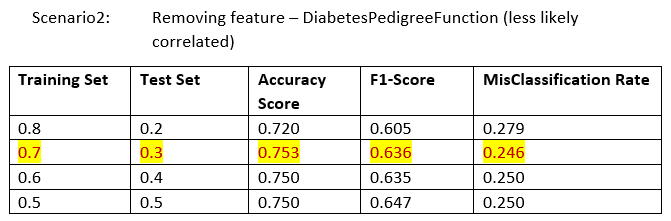